## CIFO Baseline Analysis_1

Let's try to make use of the logger.

Idea -> Load Data into Frame and compute statistics and graphs

In [57]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [58]:
headers = ["iteration", "elite.fitness", "elite.validation_fitness", "population_size", "selection_method", "crossover_method", "crossover_rate",
                             "mutation_method", "None", "None", "mutation_rate", "phenotypic_diversity_shift"]

In [59]:
#loading CSV of CIFO data
baseline_analysis_1 = pd.read_csv("baseline_analysis_1.csv",
                             sep= ",",
                             header = None,
                             names = headers)

baseline_analysis_2 = pd.read_csv("baseline_analysis_2.csv",
                             sep= ",",
                             header = None,
                             names = headers)

pressure_1 = pd.read_csv("pressure_radius_1.csv",
                             sep= ";",
                             header = 0)

pressure_2 = pd.read_csv("pressure_radius_2.csv",
                             sep= ";",
                             header = 0)

In [60]:
baseline_analysis_1 = baseline_analysis_1.reset_index(drop=True)
pressure_1 = pressure_1.reset_index(drop=True)
baseline_analysis_1 = baseline_analysis_1.join(pressure_1)
baseline_analysis_1 = baseline_analysis_1.drop(["None", "None.1"], axis=1)
baseline_analysis_1 = baseline_analysis_1.loc[baseline_analysis_1["selection_method"]=="tournament_selection",:]

In [61]:
baseline_analysis_2 = baseline_analysis_2.reset_index(drop=True)
pressure_2 = pressure_2.reset_index(drop=True)
baseline_analysis_2 = baseline_analysis_2.join(pressure_2)
baseline_analysis_2 = baseline_analysis_2.drop(["None", "None.1"], axis=1)

In [62]:
baseline = pd.concat([baseline_analysis_1,baseline_analysis_2], ignore_index=True)

In [63]:
baseline.describe()

iteration  elite.fitness  elite.validation_fitness  population_size  \
count  16200.000000   16200.000000              16200.000000          16200.0   
mean      49.500000       0.289100                  0.285433             50.0   
std       28.866961       0.064933                  0.069991              0.0   
min        0.000000       0.158004                  0.116183             50.0   
25%       24.750000       0.241164                  0.228216             50.0   
50%       49.500000       0.282744                  0.282158             50.0   
75%       74.250000       0.332640                  0.336100             50.0   
max       99.000000       0.524948                  0.543568             50.0   

       crossover_rate  mutation_rate  phenotypic_diversity_shift  \
count    16200.000000   16200.000000                16200.000000   
mean         0.500000       0.500000                    0.000214   
std          0.326609       0.326609                    0.012640   
min          0.100000       0.100000                   -0.096350   
25%          0.100000       0.100000                   -0.005933   
50%          0.500000       0.500000                    0.000089   
75%          0.900000       0.900000                    0.006220   
max          0.900000       0.900000                    0.098419   

             Radius      Pressure  
count  16200.000000  16200.000000  
mean       0.600000      0.500000  
std        0.326609      0.326609  
min        0.200000      0.100000  
25%        0.200000      0.100000  
50%        0.600000      0.500000  
75%        1.000000      0.900000  
max        1.000000      0.900000

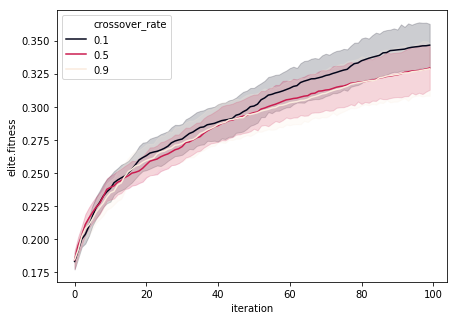

In [64]:
plt.subplots(figsize=(7,5))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="crossover_rate",
             data=baseline,
            palette= "rocket",
            err_style="band",
            legend="full")

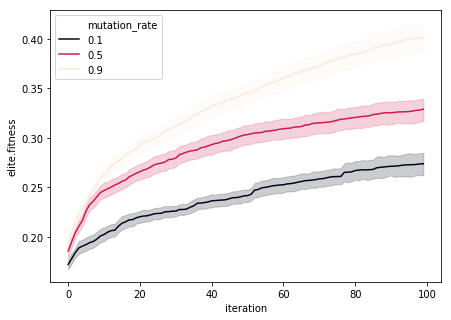

In [65]:
plt.subplots(figsize=(7,5))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="mutation_rate",
             data=baseline,
            palette= "rocket",
            err_style="band",
            legend="full")

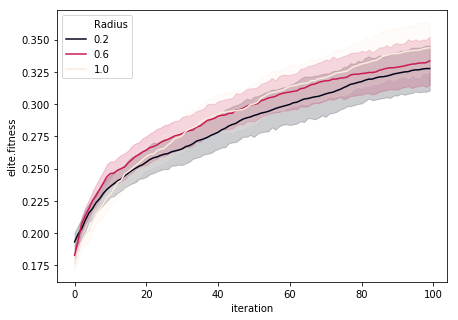

In [66]:
plt.subplots(figsize=(7,5))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="Radius",
             data=baseline,
            palette= "rocket",
            err_style="band",
            legend="full")

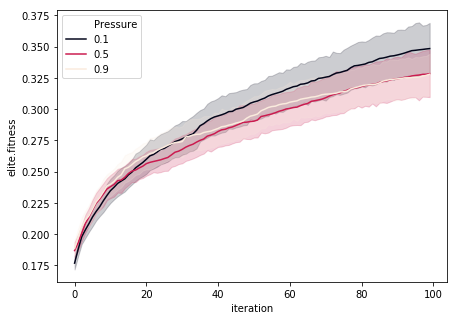

In [67]:
plt.subplots(figsize=(7,5))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="Pressure",
             data=baseline,
            palette= "rocket",
            err_style="band",
            legend="full")

In [68]:
baseline_sorted = baseline.sort_values(by="elite.fitness")

In [69]:
baseline_sorted.tail()

iteration  elite.fitness  elite.validation_fitness  population_size  \
8996         96       0.524948                  0.543568               50   
8997         97       0.524948                  0.543568               50   
8998         98       0.524948                  0.543568               50   
8985         85       0.524948                  0.543568               50   
8993         93       0.524948                  0.543568               50   

          selection_method     crossover_method  crossover_rate  \
8996  tournament_selection  one_point_crossover             0.9   
8997  tournament_selection  one_point_crossover             0.9   
8998  tournament_selection  one_point_crossover             0.9   
8985  tournament_selection  one_point_crossover             0.9   
8993  tournament_selection  one_point_crossover             0.9   

     mutation_method  mutation_rate  phenotypic_diversity_shift  Radius  \
8996   ball_mutation            0.9                    0.002297     1.0   
8997   ball_mutation            0.9                   -0.016781     1.0   
8998   ball_mutation            0.9                   -0.006062     1.0   
8985   ball_mutation            0.9                    0.008553     1.0   
8993   ball_mutation            0.9                   -0.016560     1.0   

      Pressure  
8996       0.5  
8997       0.5  
8998       0.5  
8985       0.5  
8993       0.5

In [70]:
#a list with the best results for each individual run
baseline_best = baseline.loc[baseline["iteration"]==99, ["elite.fitness","crossover_rate", "mutation_rate", "Radius", "Pressure" ]]
baseline_best = baseline_best.sort_values(by="elite.fitness", ascending=False)

In [71]:
baseline_best.rename(index=str, columns={"elite.fitness": "Fitness", "crossover_rate": "Crossover","mutation_rate": "Mutation"}, inplace=True)

In [72]:
baseline_best.head()

Fitness  Crossover  Mutation  Radius  Pressure
8999   0.524948        0.9       0.9     1.0       0.5
599    0.511435        0.1       0.9     1.0       0.1
11699  0.495842        0.9       0.9     0.6       0.1
11099  0.488565        0.1       0.9     0.6       0.1
14099  0.468815        0.5       0.9     0.6       0.1